In [131]:
!head AGN_practico_topicos.dat

# PLATE   MJD     FIB   ra           dec         z         Mu          Mg          Mr          Mi          Mz          concind   stmass    sfrmst      sfr       dn4000   bpty      bptx      bptx2     bptx3     SN_Hbeta   SN_OIII   SN_OI     SN_Halpha   SN_NII    SN_SII6717   SN_SII6731   agn_type   LumOIII              logMBH               R                     
  348     51671   1     249.639518   -0.896539   0.05917   -17.08689   -18.70838   -19.65643   -20.07301   -20.3064    2.94789   10.1229   -11.52136   -1.3445   1.7508   0.0769    -0.2297   -0.1513   -0.7399   3.7274     3.9463    2.1282    8.5564      5.768     4.5135       3.058        100        4.676236889984032    7.200187175637402    -2.5239502856533704   
  300     51943   98    207.689028   -0.78399    0.08276   -18.29077   -19.6594    -20.37956   -20.78272   -21.01888   3.06824   10.2774   -10.31623   0.0123    1.3682   0.2454    -0.1193   -0.2746   -0.8831   15.1725    22.939    10.5345   55.2827     45.6349   16.3328

In [302]:
import numpy as np
import astropy
import matplotlib.pyplot as plt

In [262]:
from astropy.io import ascii
SDSS_compact = ascii.read("SDSS_Compact_Groups.dat")
SDSS_full = ascii.read("AGN_practico_topicos.dat")

In [323]:
plt.style.use('dark_background')

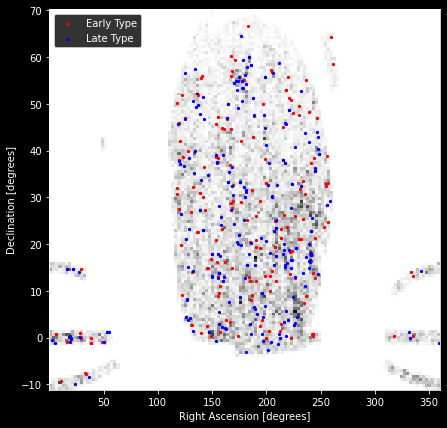

In [327]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.hist2d(SDSS_full['ra'],SDSS_full['dec'],cmap='Greys',bins=128)
latetype = (SDSS_compact['MT'] == 2)
earlytype = (SDSS_compact['MT'] == 1)

ax.scatter(SDSS_compact['ra'][earlytype],SDSS_compact['dec'][earlytype],color='red',s=5,label='Early Type')
ax.scatter(SDSS_compact['ra'][latetype],SDSS_compact['dec'][latetype],color='blue',s=5,label='Late Type')
ax.legend(loc='upper left')
ax.text(0.15,0.7,f'$N_s$={len(SDSS_compact)}',transform=ax.transAxes)
ax.set_xlabel('Right Ascension [degrees]')
ax.set_ylabel('Declination [degrees]')


fig.savefig('sampleshow.png',dpi=200)

In [134]:
np.mean(SDSS_compact['ra']-SDSS_compact['_RAJ2000'])

-1.1537558648894139e-07

In [135]:
SDSS_compact.keys()

['PLATE',
 'MJD',
 'FIB',
 'ra',
 'dec',
 'z_1',
 'Mu',
 'Mg',
 'Mr',
 'Mi',
 'Mz',
 'concind',
 'stmass',
 'sfrmst',
 'sfr',
 'dn4000',
 'bpty',
 'bptx',
 'bptx2',
 'bptx3',
 'SN_Hbeta',
 'SN_OIII',
 'SN_OI',
 'SN_Halpha',
 'SN_NII',
 'SN_SII6717',
 'SN_SII6731',
 'agn_type',
 'LumOIII',
 'logMBH',
 'R',
 '_RAJ2000',
 '_DEJ2000',
 'MLCG',
 'GalID',
 'RAJ2000',
 'DEJ2000',
 'MT',
 'rmag',
 'u-r',
 'z_2',
 'e_z',
 'r_z',
 'Mstar',
 'E_Mstar_2',
 'e_Mstar_2a',
 'Sloan',
 'SimbadName',
 'NED',
 'Separation']

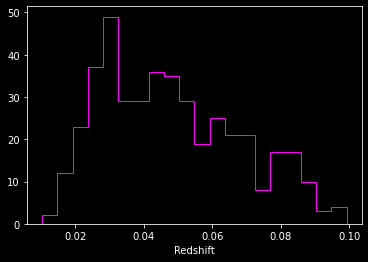

In [338]:
plt.hist(SDSS_compact['z_1'],bins=20,histtype='step',color='magenta')
plt.xlabel('Redshift')
plt.savefig('redshiftdist.png',dpi=200)

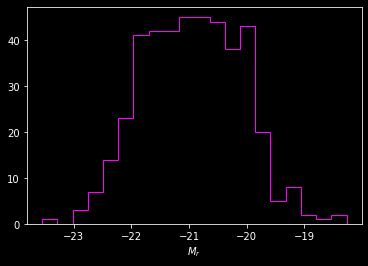

In [339]:
plt.hist(SDSS_compact['Mr'],bins=20,histtype='step',color='magenta')
plt.xlabel(r'$M_r$')
plt.savefig('magdist.png',dpi=200)

In [ ]:
# y > 0.61/(x-0.05) + 1.3

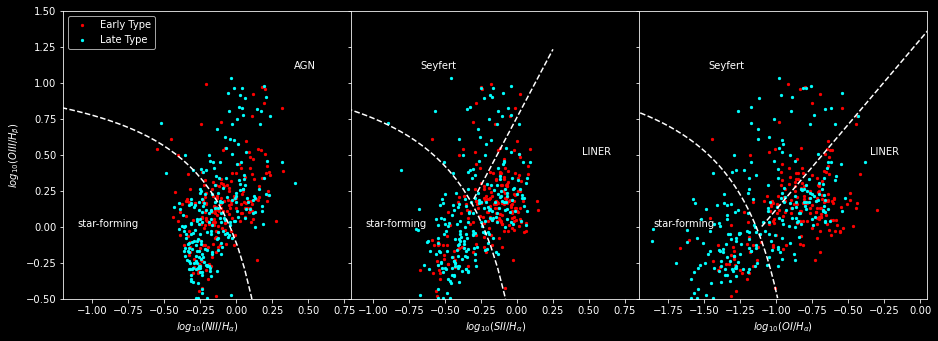

In [346]:
fig, axes = plt.subplots(1,3,figsize=(12,4),sharey=True,squeeze=True)

latetype = (SDSS_compact['MT'] == 2)
earlytype = (SDSS_compact['MT'] == 1)

x = np.linspace(-2.1,0.25,50)
xalt = np.linspace(-2.1,-0.99,50)
y1 = ((0.61)/(x-0.47))+1.19
y2 = ((0.72)/(x-0.32))+1.30
y3 = ((0.73)/(xalt+0.59))+1.33
x2 = np.linspace(-.3,0.25,50)
x3 = np.linspace(-1.1,0.25,50)
y2_2 = 1.89*x2+0.76
y3_2 = 1.18*x3+1.30

fig.tight_layout()
for ax in axes:
    ax.axis('equal')
    pass
axes[0].scatter(SDSS_compact['bptx'][earlytype],SDSS_compact['bpty'][earlytype],s=5,color='red',label='Early Type')
axes[0].scatter(SDSS_compact['bptx'][latetype],SDSS_compact['bpty'][latetype],s=5,color='cyan',label='Late Type')
axes[0].text(.05,.25,'star-forming',transform=axes[0].transAxes)
axes[0].text(.8,.8,'AGN',transform=axes[0].transAxes)
axes[0].plot(x,y1,'--',color='white')
axes[0].set_xlim(-1.4,1)
axes[0].set_ylim(-.5,1.5)
axes[0].set_xlabel(r'$log_{10}(NII/H_\alpha)$')
axes[0].set_ylabel(r'$log_{10}(OIII/H_\beta)$')
axes[1].scatter(SDSS_compact['bptx2'][earlytype],SDSS_compact['bpty'][earlytype],s=5,color='red')
axes[1].scatter(SDSS_compact['bptx2'][latetype],SDSS_compact['bpty'][latetype],s=5,color='cyan')
axes[1].text(.05,.25,'star-forming',transform=axes[1].transAxes)
axes[1].text(.8,.5,'LINER',transform=axes[1].transAxes)
axes[1].text(.24,.8,'Seyfert',transform=axes[1].transAxes)
axes[1].plot(x,y2,'--',color='white')
axes[1].plot(x2,y2_2,'--',color='white')
axes[1].set_xlim(-1.1,0.8)
axes[1].set_ylim(-.5,1.5)
axes[1].set_xlabel(r'$log_{10}(SII/H_\alpha)$')
axes[2].scatter(SDSS_compact['bptx3'][earlytype],SDSS_compact['bpty'][earlytype],s=5,color='red')
axes[2].scatter(SDSS_compact['bptx3'][latetype],SDSS_compact['bpty'][latetype],s=5,color='cyan')
axes[2].text(.05,.25,'star-forming',transform=axes[2].transAxes)
axes[2].text(.8,.5,'LINER',transform=axes[2].transAxes)
axes[2].text(.24,.8,'Seyfert',transform=axes[2].transAxes)
axes[2].plot(xalt,y3,'--',color='white')
axes[2].plot(x3,y3_2,'--',color='white')
axes[2].set_xlim(-2.1,.2)
axes[2].set_ylim(-.5,1.5)
axes[2].set_xlabel(r'$log_{10}(OI/H_\alpha)$')

axes[0].legend(loc='upper left')
fig.subplots_adjust(0,0,1,1,0,0)
fig.savefig('bpts.png',dpi=200)

In [236]:
len(SDSS_compact['bpty'][earlytype]),len(SDSS_compact['bpty'][latetype])

(194, 232)

In [238]:
# plot 1
Star_forming = (SDSS_compact['bpty'] < ((0.61)/(SDSS_compact['bptx']-0.47))+1.19)
len(np.nonzero(Star_forming[earlytype])[0]),len(np.nonzero(Star_forming[latetype])[0])

(97, 144)

In [248]:
AGN = (SDSS_compact['bpty'] >= ((0.61)/(SDSS_compact['bptx']-0.47))+1.19)
len(np.nonzero(AGN[earlytype])[0]),len(np.nonzero(AGN[latetype])[0])

(97, 88)

In [244]:
# plot 2
Star_forming2 = SDSS_compact['bpty'] < ((0.72)/(SDSS_compact['bptx']-0.32))+1.30
len(np.nonzero(Star_forming2[earlytype])[0]),len(np.nonzero(Star_forming2[latetype])[0])

(46, 96)

In [243]:
Liner = (SDSS_compact['bpty'] >= ((0.72)/(SDSS_compact['bptx']-0.32))+1.30) & (SDSS_compact['bpty'] <= 1.89*SDSS_compact['bptx2']+0.76)
len(np.nonzero(Liner[earlytype])[0]),len(np.nonzero(Liner[latetype])[0])

(121, 89)

In [242]:
Seyfert = (SDSS_compact['bpty'] >= ((0.72)/(SDSS_compact['bptx']-0.32))+1.30) & (SDSS_compact['bpty'] >= 1.89*SDSS_compact['bptx2']+0.76)
len(np.nonzero(Seyfert[earlytype])[0]),len(np.nonzero(Seyfert[latetype])[0])

(27, 47)

In [241]:
# plot 3
Star_forming3 = SDSS_compact['bpty'] < (((0.73)/(SDSS_compact['bptx3']+0.59))+1.33)
len(np.nonzero(Star_forming3[earlytype])[0]),len(np.nonzero(Star_forming3[latetype])[0])

(49, 107)

In [239]:
Liner2 = (SDSS_compact['bpty'] >= (((0.73)/(SDSS_compact['bptx3']+0.59))+1.33)) & (SDSS_compact['bpty'] <= 1.18*SDSS_compact['bptx3']+1.30)
len(np.nonzero(Liner2[earlytype])[0]),len(np.nonzero(Liner2[latetype])[0])

(105, 76)

In [240]:
Seyfert2 = (SDSS_compact['bpty'] >= (((0.73)/(SDSS_compact['bptx3']+0.59))+1.33)) & (SDSS_compact['bpty'] >= 1.18*SDSS_compact['bptx3']+1.30)
len(np.nonzero(Seyfert2[earlytype])[0]),len(np.nonzero(Seyfert2[latetype])[0])

(40, 49)

In [147]:
print('z\nPromedio: ',np.mean(SDSS_compact['z_1']),'\nMediana: ',np.median(SDSS_compact['z_1']))

z
Promedio:  0.04801446009389672 
Mediana:  0.045344999999999996


In [148]:
print('Mr\nPromedio: ',np.mean(SDSS_compact['Mr']),'\nMediana: ',np.median(SDSS_compact['Mr']))

Mr
Promedio:  -20.93287075117371 
Mediana:  -20.946585


In [155]:
parameter = 'z_2'
print(f'{parameter}\nPromedio: ',np.mean(SDSS_compact[parameter]),'\nMediana: ',np.median(SDSS_compact[parameter]))

z_2
Promedio:  0.04801455399061033 
Mediana:  0.04535


In [159]:
parameter = 'Mstar'
print(f'{parameter}\nPromedio: ',np.mean(SDSS_compact[parameter]),'\nMediana: ',np.median(SDSS_compact[parameter]))

Mstar
Promedio:  10.225254716981132 
Mediana:  10.2255


In [156]:
parameter = 'Separation'
print(f'{parameter}\nPromedio: ',np.mean(SDSS_compact[parameter]),'\nMediana: ',np.median(SDSS_compact[parameter]))

Separation
Promedio:  0.01181587323560761 
Mediana:  0.010458399493451277


In [265]:
SDSS_compact['Mg-Mr'] = SDSS_compact['Mg']-SDSS_compact['Mr']

(array([  1.,   1.,   4.,   8.,   8.,  14.,  20.,  43.,  43.,  63., 105.,
         70.,  26.,   9.,   5.,   3.,   3.,   0.,   0.,   0.]),
 array([0.4  , 0.455, 0.51 , 0.565, 0.62 , 0.675, 0.73 , 0.785, 0.84 ,
        0.895, 0.95 , 1.005, 1.06 , 1.115, 1.17 , 1.225, 1.28 , 1.335,
        1.39 , 1.445, 1.5  ]),
 <BarContainer object of 20 artists>)

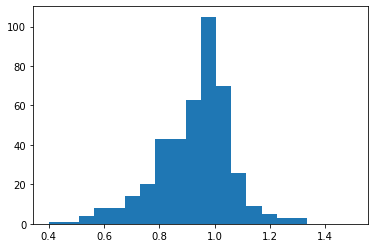

In [197]:
plt.hist(SDSS_compact['Mg-Mr'],bins=20,range=[0.4,1.5])

In [249]:
len(np.nonzero(AGN)[0])

185

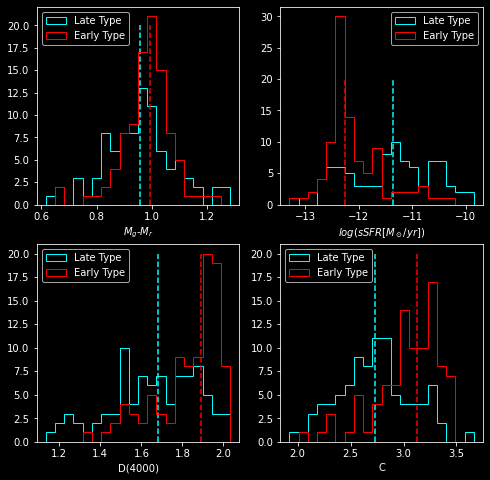

In [345]:
fig, axes = plt.subplots(2,2,figsize=(8,8))

show = ['Mg-Mr','sfrmst','dn4000','concind']

i = 0
for col in axes:
    for ax in col:
        if i == 0:
            latetype = (AGN & (SDSS_compact['MT'] == 2))
            earlytype = (AGN & (SDSS_compact['MT'] == 1))
            hist,bins,_ = ax.hist(SDSS_compact[show[i]][latetype],bins=20,color='cyan',histtype='step',label='Late Type')
            ax.plot(np.full(10,np.median(SDSS_compact[show[i]][latetype])),np.linspace(0,20,10),'--',color='cyan')
            ax.hist(SDSS_compact[show[i]][earlytype],bins=bins,color='red',histtype='step',label='Early Type')
            ax.plot(np.full(10,np.median(SDSS_compact[show[i]][earlytype])),np.linspace(0,20,10),'--',color='red')
            ax.set_xlabel(show[i])
        else:
            if (show[i] == 'dn4000'):
                latetype = ((AGN) & (SDSS_compact[show[i]] > 0.01) & (SDSS_compact['MT'] == 2))
                earlytype = ((AGN) & (SDSS_compact[show[i]] > 0.01) & (SDSS_compact['MT'] == 1))
            elif (show[i] == 'sfrmst'):
                latetype = ((AGN) & (SDSS_compact[show[i]] > -30) & (SDSS_compact['MT'] == 2))
                earlytype = ((AGN) & (SDSS_compact[show[i]] > -30) & (SDSS_compact['MT'] == 1))
            else:
                latetype = ((AGN) & (SDSS_compact[show[i]] > -10) & (SDSS_compact['MT'] == 2))
                earlytype = ((AGN) & (SDSS_compact[show[i]] > -10) & (SDSS_compact['MT'] == 1))
            hist,bins,_ = ax.hist(SDSS_compact[show[i]][latetype],bins=20,color='cyan',histtype='step',label='Late Type')
            ax.plot(np.full(10,np.median(SDSS_compact[show[i]][latetype])),np.linspace(0,20,10),'--',color='cyan')
            ax.hist(SDSS_compact[show[i]][earlytype],bins=bins,color='red',histtype='step',label='Early Type')
            ax.plot(np.full(10,np.median(SDSS_compact[show[i]][earlytype])),np.linspace(0,20,10),'--',color='red')
        i += 1
axes[0,0].legend(loc='upper left')
axes[0,0].set_xlabel('$M_g$-$M_r$')
axes[0,1].legend(loc='upper right')
axes[0,1].set_xlabel(r'$log(sSFR {[M_\odot / yr]})$')
axes[1,0].legend(loc='upper left')
axes[1,0].set_xlabel('D(4000)')
axes[1,1].legend(loc='upper left')
axes[1,1].set_xlabel('C')

fig.savefig('4veryinteresting_plots.png',dpi=200)

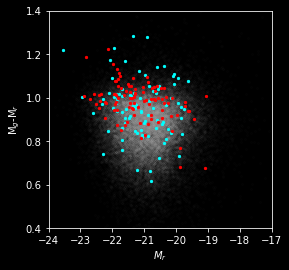

In [368]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
latetype = (AGN & (SDSS_compact['MT'] == 2))
earlytype = (AGN & (SDSS_compact['MT'] == 1))
axes.scatter(SDSS_full['Mr'],SDSS_full['Mg']-SDSS_full['Mr'],s=5,alpha=0.01,color='white')
axes.scatter(SDSS_compact['Mr'][latetype],SDSS_compact['Mg-Mr'][latetype],s=5,alpha=1,color='cyan')
axes.scatter(SDSS_compact['Mr'][earlytype],SDSS_compact['Mg-Mr'][earlytype],s=5,alpha=1,color='red')
axes.set_ylim(0.4,1.4)
axes.set_xlim(-24,-17)
axes.set_xlabel(r'$M_r$')
axes.set_ylabel(r'M$_g$-M$_r$')
fig.savefig('CMD.png',dpi=200)

In [280]:
lateAGN = len(np.nonzero(AGN & (SDSS_compact['MT'] == 2))[0])
earlyAGN = len(np.nonzero(AGN & (SDSS_compact['MT'] == 1))[0])
print(lateAGN, earlyAGN)

88 97


In [365]:
np.unique(SDSS_compact['agn_type'][SDSS_compact['MT'] == 1],return_counts=True)[1]/len(SDSS_compact),np.unique(SDSS_compact['agn_type'][SDSS_compact['MT'] == 2],return_counts=True)[1]/len(SDSS_compact)

(array([0.14084507, 0.14084507, 0.14319249, 0.03051643]),
 array([0.07276995, 0.29342723, 0.1056338 , 0.07276995]))

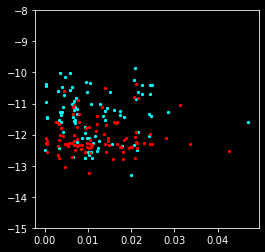

In [361]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
latetype = (AGN & (SDSS_compact['MT'] == 2))
earlytype = (AGN & (SDSS_compact['MT'] == 1))
axes.scatter(SDSS_compact['Separation'][latetype],SDSS_compact['sfrmst'][latetype],s=5,alpha=1,color='cyan')
axes.scatter(SDSS_compact['Separation'][earlytype],SDSS_compact['sfrmst'][earlytype],s=5,alpha=1,color='red')
axes.set_ylim(-15,-8)
fig.savefig('ssfrvssep.png',dpi=200)

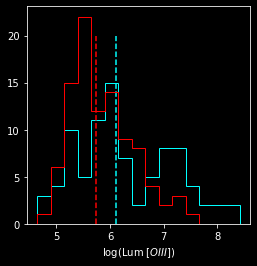

In [389]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
latetype = (AGN & (SDSS_compact['MT'] == 2))
earlytype = (AGN & (SDSS_compact['MT'] == 1))
hist,bins,_ = axes.hist(SDSS_compact['LumOIII'][latetype],bins=15,color='cyan',histtype='step',label='Late Type')
axes.plot(np.full(10,np.median(SDSS_compact['LumOIII'][latetype])),np.linspace(0,20,10),'--',color='cyan')
axes.hist(SDSS_compact['LumOIII'][earlytype],bins=bins,color='red',histtype='step',label='Early Type')
axes.plot(np.full(10,np.median(SDSS_compact['LumOIII'][earlytype])),np.linspace(0,20,10),'--',color='red')

axes.set_xlabel(r'log(Lum $[OIII]$)')
fig.savefig('LumOIII.png',dpi=200)

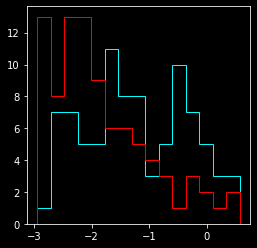

In [381]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
latetype = (AGN & (SDSS_compact['MT'] == 2))
earlytype = (AGN & (SDSS_compact['MT'] == 1))
hist,bins,_ = axes.hist(SDSS_compact['R'][latetype],bins=15,color='cyan',histtype='step',label='Late Type')
axes.hist(SDSS_compact['R'][earlytype],bins=bins,color='red',histtype='step',label='Early Type')
fig.savefig('accretionrate.png',dpi=200)